In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: # To be able to import files 
    sys.path.append(module_path) # without installing the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bayesrul.utils.plotting import PredLogger, plot_rul_pred, get_mus_rhos
from bayesrul.ncmapss.dataset import NCMAPSSDataModule
from bayesrul.ncmapss.models import NCMAPSSModelBnn, get_checkpoint


/home/arthur/.conda/envs/bnnrul/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = '../results/ncmapss/frequentist/'
model_name = 'dnn4'

In [3]:
logger = PredLogger(path+model_name)
outputs = logger.load()

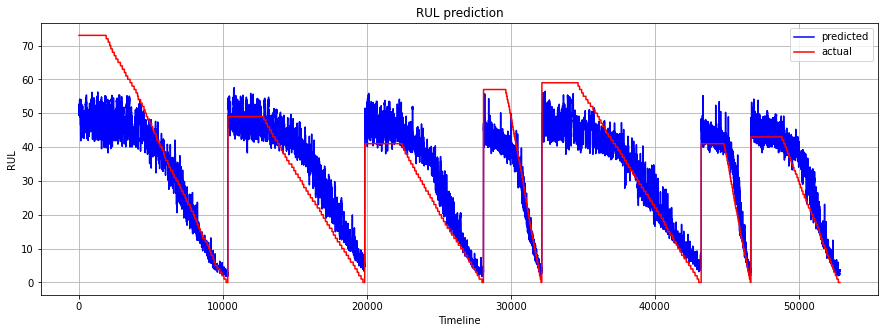

In [4]:
fig, ax = plot_rul_pred(outputs)

In [5]:
from types import SimpleNamespace
from pathlib import Path

args = SimpleNamespace(
    data_path="../data/ncmapss/",
    out_path="../results/ncmapss/",
    model_name="dnn2",
    net="linear",
    lr=1e-4
)

base_log_dir = f"{args.out_path}/bayesian/{args.model_name}/"
checkpoint_dir = Path(base_log_dir, f"checkpoints/{args.net}")

data = NCMAPSSDataModule(args.data_path, batch_size=1000)
dnn = NCMAPSSModelBnn.load_from_checkpoint(get_checkpoint(checkpoint_dir))

In [6]:
mus = []; rhos = []
dnn.apply(lambda m: get_mus_rhos(m, mus, rhos))
print(len(mus), len(rhos))

82240 82240


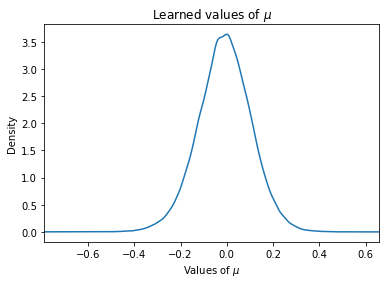

In [7]:
def plot_distribution(array, title=None, xlabel=None):
    array = np.array(array)
    pd.Series(array).plot(kind='density')
    ax = plt.gca()
    xlim = ax.get_xlim()
    mi, ma = array.min(), array.max()
    xlim = mi + 0.05 * (np.abs(xlim[0] - mi)), xlim[1]
    xlim = xlim[0], ma + 0.05 * (np.abs(xlim[1] - ma))
    ax.set_xlim(xlim)
    #ax.autoscale(enable=True, axis='x', tight=True)
    if title is not None:
        plt.title(title)
    if xlabel is not None:
        plt.xlabel(xlabel)

plot_distribution(mus,  title='Learned values of $\mu$', 
                        xlabel='Values of $\mu$')

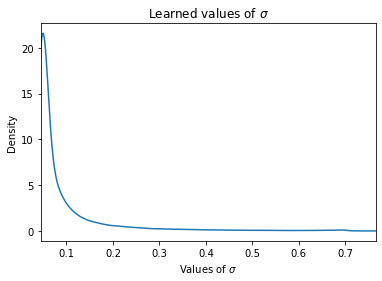

In [8]:
plot_distribution(rhos, title='Learned values of $\sigma$', 
                        xlabel='Values of $\sigma$')